## QdF

Q10  = 1.30 m3/s
rain.discharge_Q10 = 1.2962925436807478
rain.specific_discharge = 1.2962925436807478
rain.return_period = 100
ds = 1
2.477628620340532
3.822638080298524


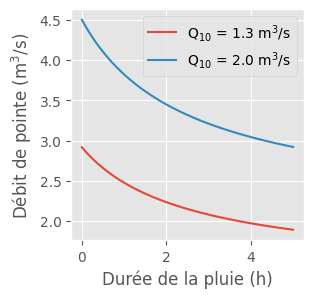

invalid command name "140624488461568update"
    while executing
"140624488461568update"
    ("after" script)
invalid command name "140624491938304check_dpi_scaling"
    while executing
"140624491938304check_dpi_scaling"
    ("after" script)


rain.discharge_Q10 = 1.2962925436807478
rain.specific_discharge = 1.2962925436807478
rain.return_period = 100
ds = 1
2.477628620340532
3.822638080298524


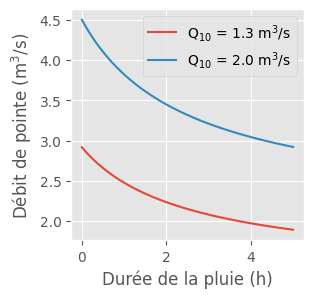

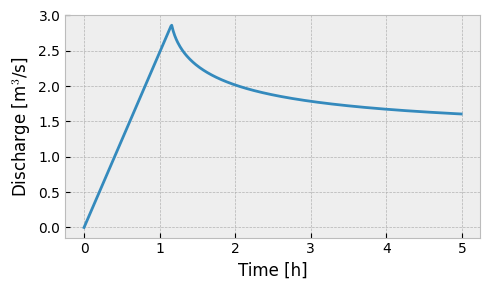

In [2]:
from hydrogibs import QDF
from hydrogibs.misc import crupedix

# Q(T=10) selon Crupédix
Q10 = crupedix(S=1.8, Pj10=72, R=1.0)
# Q10 = 2.0
print(f"{Q10  = :.2f} m3/s")

# Estimation de Q(T=100) selon la méthode QdF
catchment = QDF.Catchment(model="soyans", specific_duration=1)
rain = QDF.Rain(duration=1,
                return_period=100,
                specific_discharge=Q10,
                discharge_Q10=Q10,
                dt=0.01)

# QDF.App(rain=rain, catchment=catchment, style="ggplot")

event = rain @ catchment
event.diagram(style="bmh")

## GR4

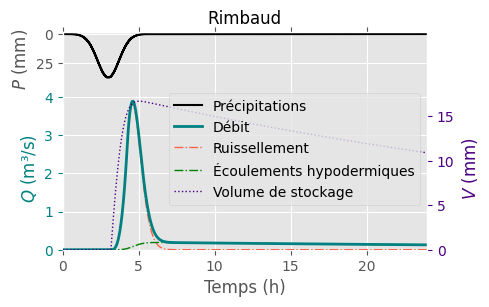

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from hydrogibs import GR4

# Laval
X1 = 57.6/100  # [-] dR = X1*dP
X2 = 7.28  # [mm] Interception par la végétation
X3 = 2.4/100  # [h^-1] dH = X3*V*dt, V = (1-X1)*I*dt
X4 = 0.38  # [h] temps de montée tm ≃ td

t0 = 1  # h
I0 = 66.7  # mm/h

dt = 0.01
time = np.arange(0, 24, step=dt)
unit_rain = np.exp(-(time - 3)**2)
unit_rain = unit_rain / np.trapz(x=time, y=unit_rain)
rain = GR4.Rain(time, unit_rain * I0)

ax1, ax2, ax3 = (rain @ GR4.Rimbaud(surface=1.8)).diagram(figsize=(5, 3), show=False).axes
ax2.set_title("Rimbaud")
plt.show()

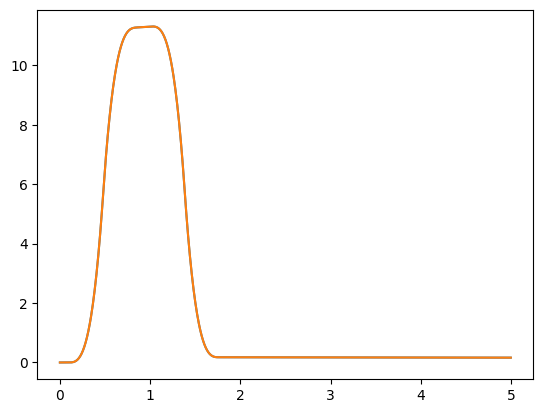

In [11]:
from matplotlib import pyplot as plt
import numpy as np
from hydrogibs import GR4

rain = GR4.BlockRain(intensity=70, duration=1)
catchment = GR4.Catchment(X1=57.6/100, X2=7.28, X3=2.4/100, X4=0.38)

event = rain @ catchment
time = event.time
discharge = event.discharge

plt.plot(time, discharge)
plt.show()

## Méthode Rationnelle

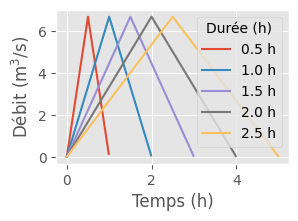

In [14]:
from hydrogibs.RationalMethod import rational_method

durations = np.array((0.5, 1, 1.5, 2, 2.5))

with plt.style.context("ggplot"):
    plt.figure(figsize=(3, 2))
    for d in durations:
        t, Q = rational_method(S=1.8, Cr=0.2, tc=d, ip=66.7)
        plt.plot(t, Q, label=f"{d:.1f} h")
    plt.xlabel("Temps (h)")
    plt.ylabel("Débit (m$^3$/s)")
    plt.legend(title="Durée (h)")
    plt.show()